In [626]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

# Data Collection and Analysis

In [627]:
# Loading the dataset 
df = pd.read_csv('bigdatamart_Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Item_Outlet_Sales is our target variable.This is float type data so we will use Regression in this dataset.

In [629]:
df.shape

(8523, 12)

There are 8523 rows and 12 columns.

In [630]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [631]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#categorical Features:
Item_Identifier
Item_Fat_Content  
Item_Type
Outlet_Identifier 
Outlet_Size 
Outlet_Location_Type 
Outlet_Type  

In [632]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are 1463 missing values in Item_Weight and 2410 in Outlet_Size.

#removing missing values: Item_Weight is float type data so we can replace nan value by Mean and Outlet_Size is object type so we can replace nan value by Mode. 


In [633]:
# Mean value of Item_Weight 
df['Item_Weight'].mean()

12.857645184136183

In [634]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [635]:
df['Outlet_Size']= df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [636]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [637]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Now There are no missing values.

# Data Analysis

In [638]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [639]:
dfcor = df.corr()
dfcor

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

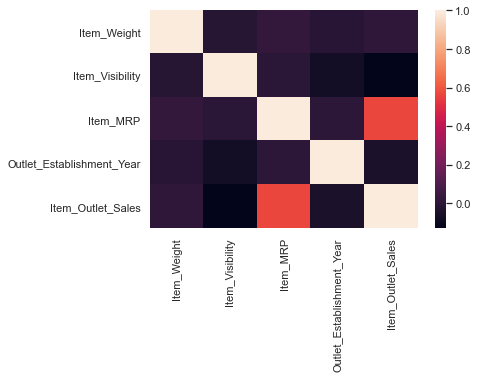

In [640]:
sns.heatmap(dfcor)

In [648]:
df.skew()

Item_Weight                  0.090561
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

Skew presents in Item_visibility,and outlet_type.

Item_Weight                     AxesSubplot(0.125,0.536818;0.110714x0.343182)
Item_Visibility              AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Item_MRP                     AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Outlet_Establishment_Year    AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Item_Outlet_Sales            AxesSubplot(0.656429,0.536818;0.110714x0.343182)
dtype: object

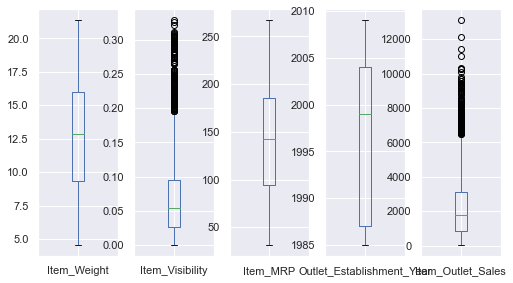

In [649]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

In [651]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [652]:
threshold=3
print(np.where(z>3))

(array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
        456,  472,  502,  521,  532,  661,  694,  753,  809,  854,  935,
        991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324, 1434,
       1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827, 1841,
       1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324, 2439,
       2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895, 3017, 3083,
       3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458, 3474, 3488,
       3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884, 3993, 4006,
       4219, 4289, 4346, 4349, 4382, 4408, 4530, 4656, 4674, 4676, 4681,
       4772, 4789, 4888, 4941, 4961, 4991, 5031, 5065, 5150, 5177, 5185,
       5223, 5287, 5315, 5374, 5500, 5550, 5619, 5732, 5734, 5752, 5795,
       5799, 5812, 5837, 5880, 5891, 5946, 5977, 6000, 6008, 6012, 6134,
       6179, 6334, 6409, 6536, 6537, 6541, 6576, 6606, 6622, 6674, 6786,
       6886, 6903, 6993, 7005, 7016, 7076, 7088, 7

In [653]:
df_new=df[(z<3).all(axis=1)]

In [654]:
df_new

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [655]:
df.shape

(8523, 12)

In [656]:
df_new.shape

(8338, 12)

In [657]:
data_loss=((8523-8338)/8523)*100
data_loss

2.170597207556025

Dataloss is not much.

In [658]:
df=df_new

In [661]:
df.shape

(8338, 12)

In [662]:
sns.set()

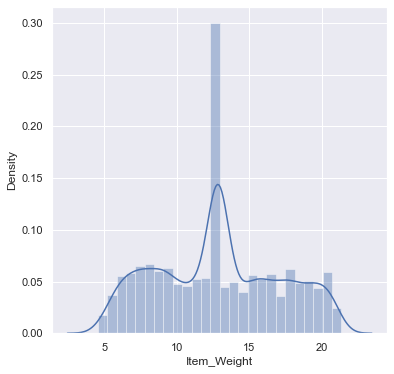

In [663]:
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Weight'])
plt.show()

Maximum value at the weight 12. 

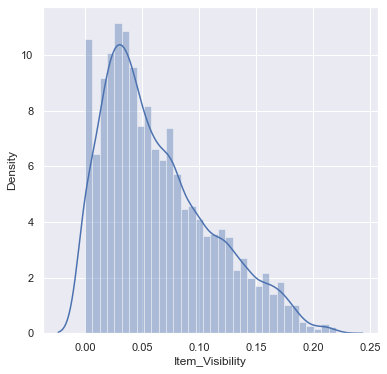

In [664]:
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Visibility'])
plt.show()


Skewness present in this column.

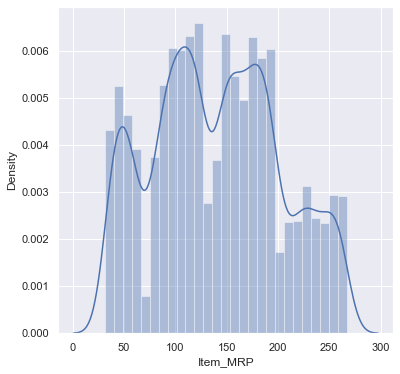

In [665]:
plt.figure(figsize=(6,6))
sns.distplot(df['Item_MRP'])
plt.show()

We have more product in the range of 100-200.

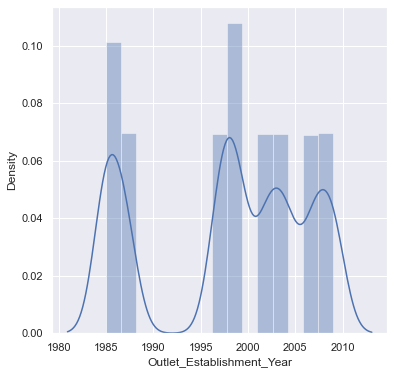

In [666]:
plt.figure(figsize=(6,6))
sns.distplot(df['Outlet_Establishment_Year'])
plt.show()

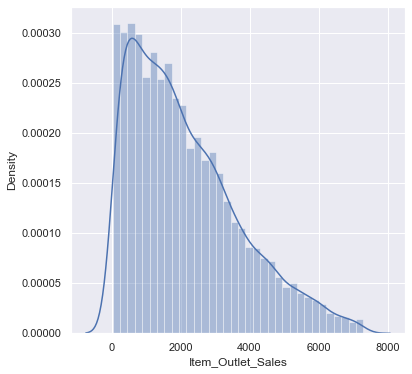

In [667]:
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

skewness is present.

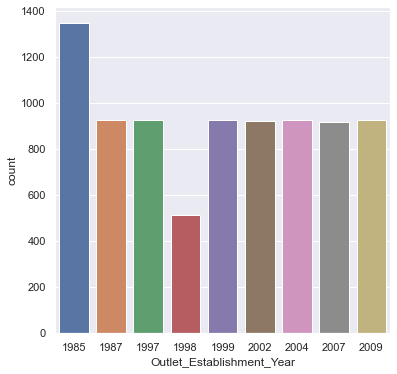

In [668]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year',data=df)
plt.show()

lot of store establish in 1985 and very less in 1998.

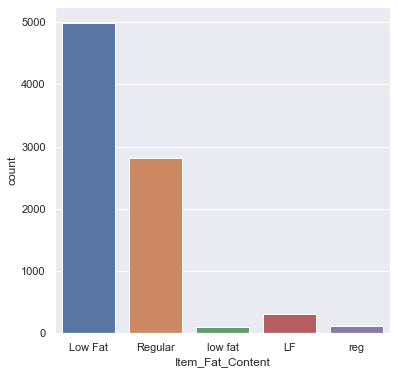

In [669]:
#Categorical Features
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content',data=df)
plt.show()

more values in Low fat and Regular.

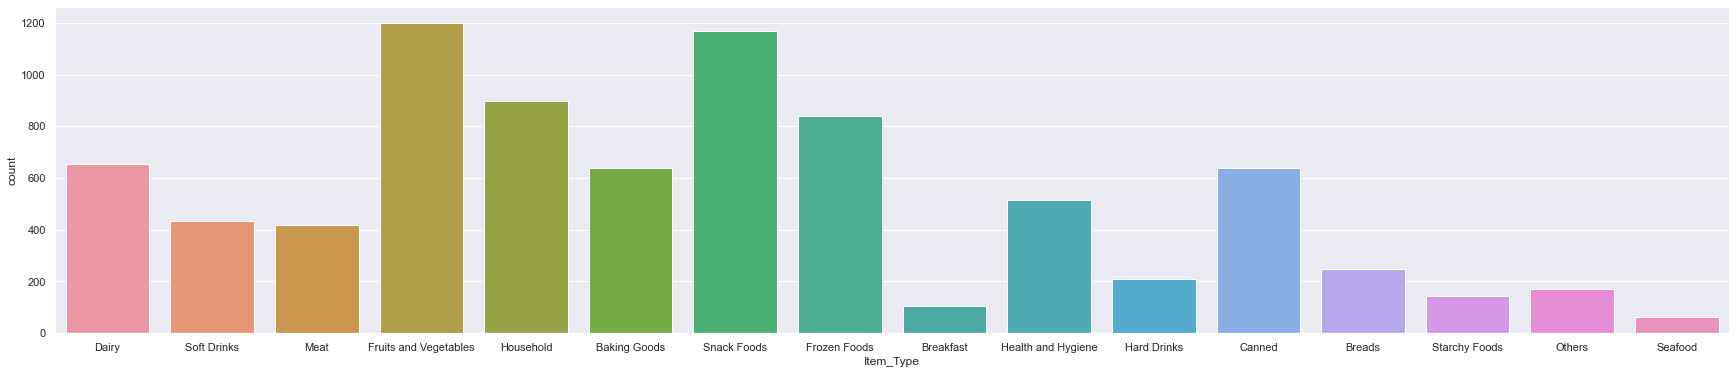

In [670]:
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type',data=df)
plt.show()

more values in fruits and veggies and snacks column.

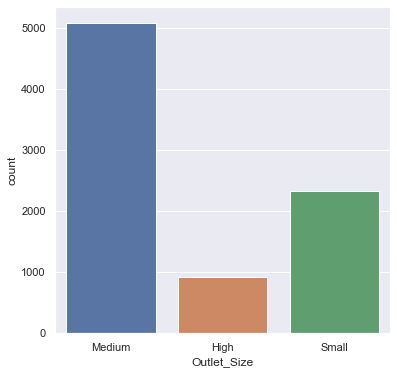

In [671]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size',data=df)
plt.show()

Medium size outlet has more counts.

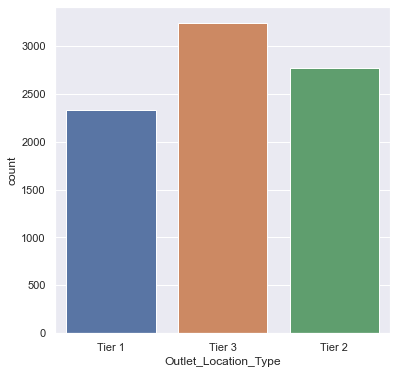

In [672]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Location_Type',data=df)
plt.show()

more counts in tier 3 location type.

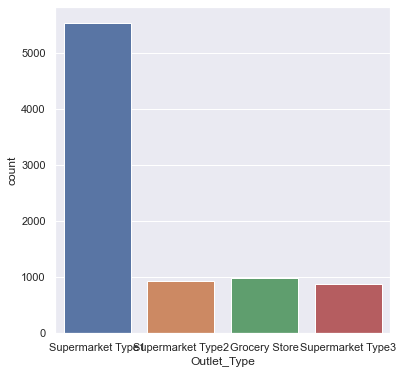

In [673]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Type',data=df)
plt.show()

more count in Supermarket type outlet.

# Data Preprocessing

In [674]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


we will convert all categorical data into numeric data.

In [675]:
df['Item_Fat_Content'].value_counts()

Low Fat    4989
Regular    2817
LF          307
reg         116
low fat     109
Name: Item_Fat_Content, dtype: int64

In [676]:
df.replace({'Item_Fat_Content':{'low fat':'Low Fat','Low_Fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [677]:
df['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    2933
Name: Item_Fat_Content, dtype: int64

In [678]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8338 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8338 non-null   object 
 1   Item_Weight                8338 non-null   float64
 2   Item_Fat_Content           8338 non-null   object 
 3   Item_Visibility            8338 non-null   float64
 4   Item_Type                  8338 non-null   object 
 5   Item_MRP                   8338 non-null   float64
 6   Outlet_Identifier          8338 non-null   object 
 7   Outlet_Establishment_Year  8338 non-null   int64  
 8   Outlet_Size                8338 non-null   object 
 9   Outlet_Location_Type       8338 non-null   object 
 10  Outlet_Type                8338 non-null   object 
 11  Item_Outlet_Sales          8338 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.1+ MB


In [679]:
#Label Encoding

encoder = LabelEncoder()
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Establishment_Year'] = encoder.fit_transform(df['Outlet_Establishment_Year'])
df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

In [680]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,4,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,8,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,4,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,3,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1,0,2,1,994.7052


In [681]:
#spliting features and target
x= df.drop('Item_Outlet_Sales',axis=1)
y= df['Item_Outlet_Sales']

In [682]:
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,0,0.016047,4,249.8092,9,4,1,0,1
1,8,5.920,1,0.019278,14,48.2692,3,8,1,2,2
2,662,17.500,0,0.016760,10,141.6180,9,4,1,0,1
3,1121,19.200,1,0.000000,6,182.0950,0,3,1,2,0
4,1297,8.930,0,0.000000,9,53.8614,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1,0,2,1
8519,897,8.380,1,0.046982,0,108.1570,7,5,1,1,1
8520,1357,10.600,0,0.035186,8,85.1224,6,6,2,1,1
8521,681,7.210,1,0.145221,13,103.1332,3,8,1,2,2


In [683]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8338, dtype: float64

In [684]:
#spliting data into training data and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [685]:
print(x.shape,x_train.shape,x_test.shape)

(8338, 11) (6670, 11) (1668, 11)


In [686]:
print(y.shape,y_train.shape,y_test.shape)

(8338,) (6670,) (1668,)


In [687]:
lm= LinearRegression()

In [688]:
lm.fit(x_train,y_train)

LinearRegression()

In [689]:
lm.coef_

array([ 1.89159032e-02, -4.17785670e+00,  4.01769140e+01, -1.02876420e+03,
       -1.06192125e+00,  1.48311819e+01,  5.91383465e+01,  1.30653359e+01,
       -3.50627128e+02, -2.33356619e+02,  8.00889514e+02])

In [690]:
lm.intercept_

-474.27789670357106

In [691]:
lm.score(x_train,y_train)

0.5050283566445166

# Regularization

In [692]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [693]:
from sklearn.linear_model import Lasso

parameters ={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [694]:
ls = Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss = r2_score(y_test,pred_ls)
lss

0.4747159569799846

we are getting same accuracy.

In [695]:
cv_score = cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.4971421668177259

# Ensemble Technique

In [ ]:
from sklearn.ensemble import RandomForestRegressor

parameters ={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf= RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

In [ ]:
rf=RandomForestRegressor(criterion='mse',max_features='log2')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:' ,rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state =0, max_depth =5)
dt.fit(x_train,y_train)

In [ ]:
dt.score(x_train,y_train)

In [ ]:
predictions = dt.predict(x_test)

In [ ]:
dtscore = cross_val_score(dt,x,y,cv=5)
dtc=dtscore.mean()
print('Cross Val Score:',dtc*100)

We will take difference of cross_val_score and accuracy as per the least difference decide the model.we got same difference of 3 models.
consider best model is decision tree.

# Hyper Parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameter ={'max_depth':np.arange(2,10),
           'criterion':['gini','entropy'],
           'splitter':['best','random'],
           'max_features':['auto','sqrt','log2']}

In [ ]:
GCV=GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [ ]:
GCV.best_params_

In [ ]:
import pickle
filename ='bigdatamart.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [ ]:
loaded_model = pickle.load(open('bigdatamart.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

In [ ]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion